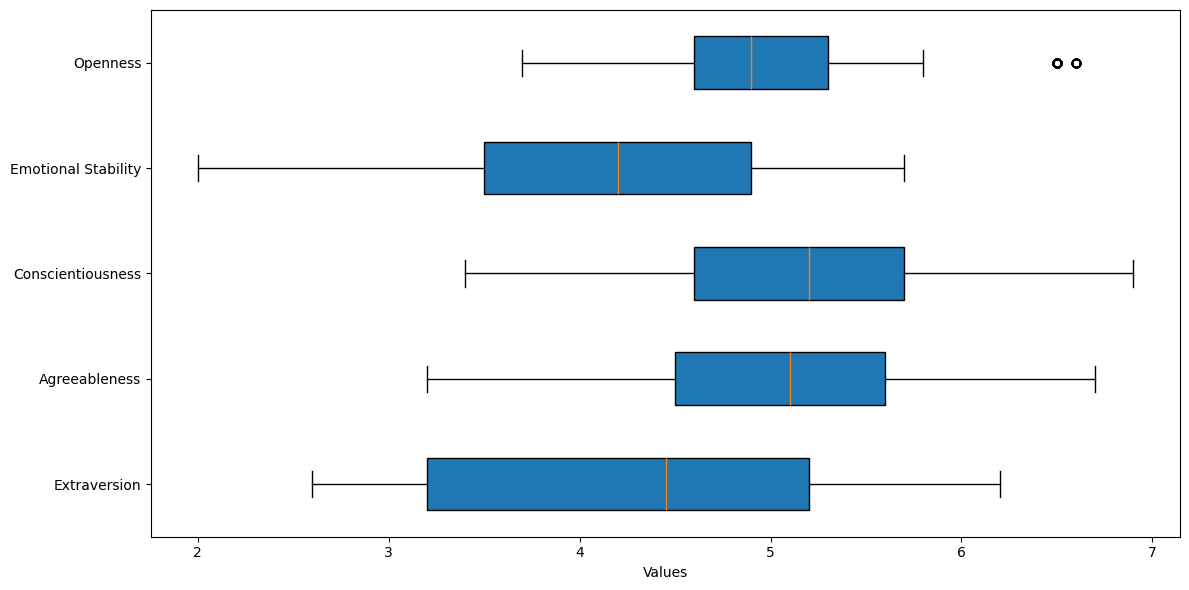

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Load features 
personalities_path = "../data/org_data.csv"
personalities_df = pd.read_csv(personalities_path)

# remove_features 
remove_features = ['recordings', 'participants', 'low_freq_psd_1', 'low_freq_psd_2',
       'low_freq_psd_3', 'low_freq_psd_4', 'low_freq_psd_5', 'low_freq_psd_6',
       'low_freq_psd_7', 'low_freq_psd_8', 'low_freq_psd_9', 'low_freq_psd_10',
       'slow_response_pds_1', 'slow_response_pds_2', 'slow_response_pds_3',
       'slow_response_pds_4', 'ibi_1', 'ibi_2', 'ibi_3', 'ibi_4', 'ibi_5',
       'ibi_6', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hrv_1',
       'hrv_2', 'hrv_3', 'hrv_4', 'hrv_5', 'hrv_6', 'Arousal', 'Valence',
       'Engagement', 'Liking', 'Familiarity',
       'Extraversion_bin', 'Agreeableness_bin', 'Conscientiousness_bin',
       'Emotional Stability_bin', 'Openness_bin']

# Assuming personalities_df is your DataFrame with personality traits
plt.figure(figsize=(12, 6))
personalities_df = personalities_df.drop(columns=remove_features)


# Create a grouped box plot for all features
box_data = [personalities_df[col] for col in personalities_df.columns]
plt.boxplot(box_data, vert=False, patch_artist=True, widths=0.5)

# Set labels for each feature
feature_labels = personalities_df.columns
plt.yticks(range(1, len(feature_labels) + 1), feature_labels)

# Set labels and title
plt.xlabel('Values')

plt.savefig('figures/box_plot_personality_traits.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


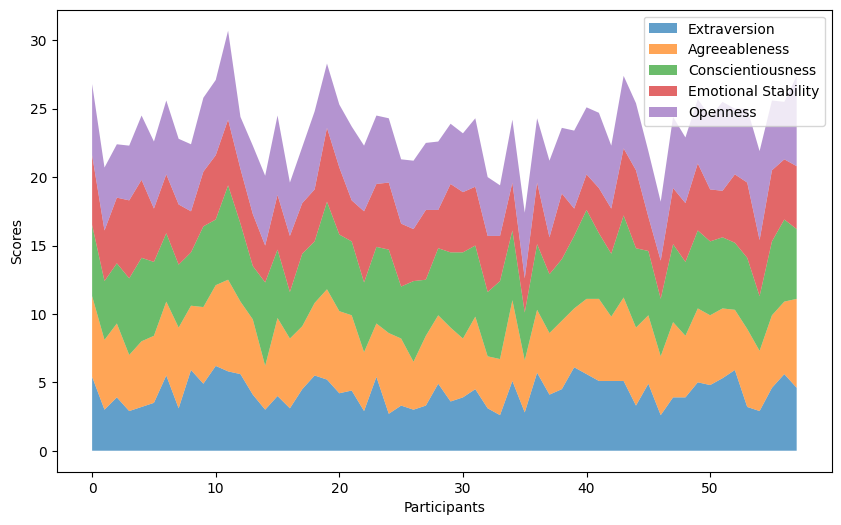

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load features 
personalities_path = "../data/org_data.csv"
personalities_df = pd.read_csv(personalities_path)

# remove_features 
remove_features = ['recordings', 'low_freq_psd_1', 'low_freq_psd_2',
       'low_freq_psd_3', 'low_freq_psd_4', 'low_freq_psd_5', 'low_freq_psd_6',
       'low_freq_psd_7', 'low_freq_psd_8', 'low_freq_psd_9', 'low_freq_psd_10',
       'slow_response_pds_1', 'slow_response_pds_2', 'slow_response_pds_3',
       'slow_response_pds_4', 'ibi_1', 'ibi_2', 'ibi_3', 'ibi_4', 'ibi_5',
       'ibi_6', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hrv_1',
       'hrv_2', 'hrv_3', 'hrv_4', 'hrv_5', 'hrv_6', 'Arousal', 'Valence',
       'Engagement', 'Liking', 'Familiarity',
       'Extraversion_bin', 'Agreeableness_bin', 'Conscientiousness_bin',
       'Emotional Stability_bin', 'Openness_bin']

personalities_df = personalities_df.drop(columns=remove_features)

# Drop duplicates based on the 'participant' column to keep only the first instance of each participant
selected_participants = personalities_df.drop_duplicates(subset='participants')

# Create a stacked area plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Set the x-axis values and labels
x = range(len(selected_participants))

# Initialize the y-values for the stacked area plot
y_bottom = np.zeros(len(selected_participants))

# Define the personality traits you want to plot
traits_to_plot = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Emotional Stability', 'Openness']

# Plot each trait as a separate area
for trait in traits_to_plot:
    plt.fill_between(x, y_bottom, y_bottom + selected_participants[trait], label=trait, alpha=0.7)
    y_bottom += selected_participants[trait]

plt.xlabel('Participants')
plt.ylabel('Scores')
plt.legend()
plt.savefig('figures/personality_distributions.png', bbox_inches='tight')
plt.show()